### Алгоритм DBSCAN

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [2]:
# Задаем массив
X = np.array([[0, 0],
            [1, 0],
            [0, 1],
            [1, 1],
            [2, 1],
            [1, 2],
            [2, 2],
            [3, 2],
            [6, 6],
            [7, 6],
            [8, 6],
            [6, 7],
            [7, 7],
            [8, 7],
            [9, 7],
            [7, 8],
            [8, 8],
            [9, 8],
            [8, 9],
            [9, 9],])

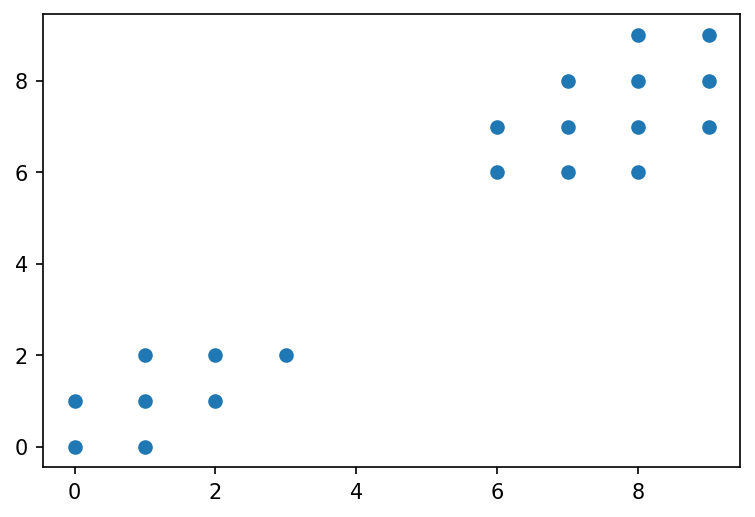

In [3]:
# Визуализация
fig = plt.figure(dpi = 150)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [4]:
dbscan = DBSCAN(eps = 1, min_samples = 2).fit(X)

In [5]:
dblbls = dbscan.labels_
print(dblbls)

[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1]


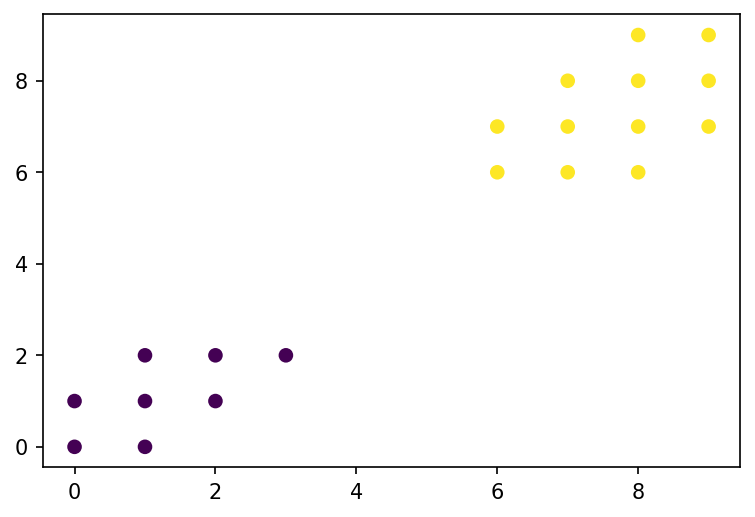

In [6]:
fig = plt.figure(dpi = 150)
plt.scatter(X[:, 0], X[:, 1], c = dblbls)
plt.show()

In [7]:
from sklearn import datasets
noisy_circles = datasets.make_circles(n_samples = 1500, factor = .5, noise = .05)

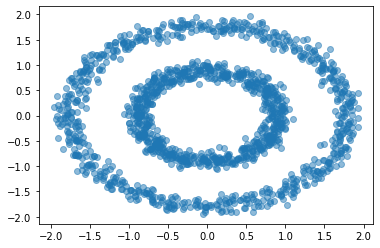

In [8]:
n_cir = noisy_circles[0] # только данные без меток
from sklearn.preprocessing import StandardScaler
n_cir = StandardScaler().fit_transform(n_cir)
plt.scatter(n_cir[:, 0], n_cir[:, 1], alpha = .5)

In [9]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters = 2).fit(n_cir)

C:\Users\VA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


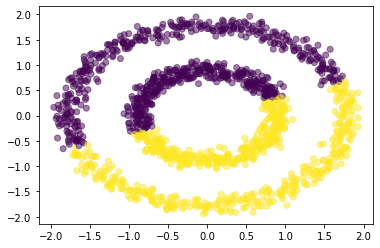

In [10]:
plt.scatter(n_cir[:, 0], n_cir[:, 1], c = k_means.labels_, alpha = .5)

In [11]:
dbcluster_cir = DBSCAN(eps = 0.3, min_samples = 5).fit(n_cir)
dblabels_cir = dbcluster_cir.labels_

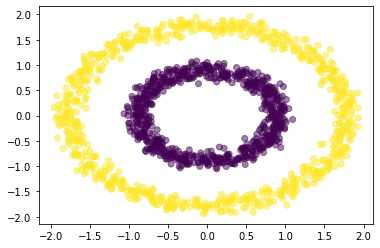

In [12]:
plt.scatter(n_cir[:, 0], n_cir[:, 1], c = dblabels_cir, alpha = .5)

In [13]:
# Работа с шумами
np.random.seed(0)
blobs = datasets.make_blobs(n_samples = 1500, cluster_std = [0.5, 1.5, 1.0], random_state = 5)

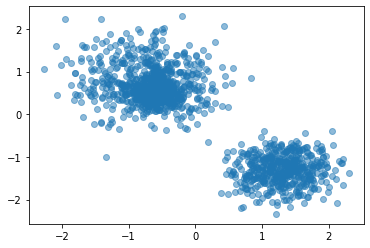

In [14]:
bl = blobs[0]
from sklearn.preprocessing import StandardScaler
bl = StandardScaler().fit_transform(bl)
plt.scatter(bl[:, 0], bl[:, 1], alpha = .5)

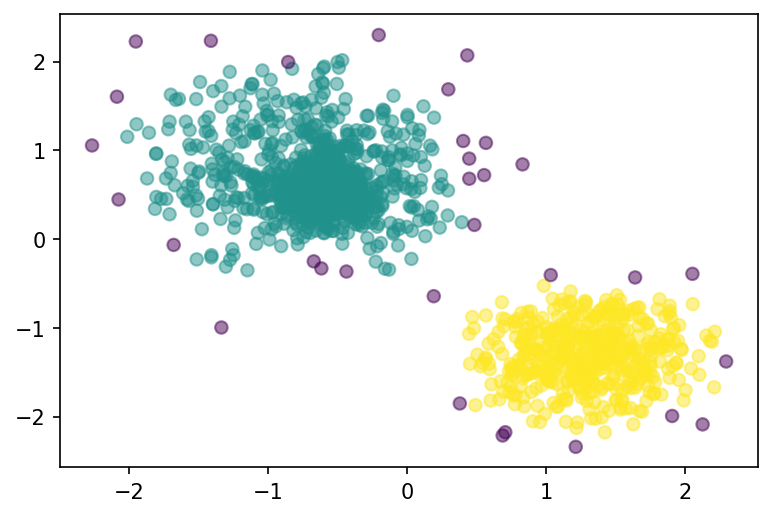

In [16]:
bl_cluster = DBSCAN(eps = 0.2).fit(bl)
fig = plt.figure(dpi = 150)
plt.scatter(bl[:, 0], bl[:, 1], alpha = .5, c = bl_cluster.labels_)
# Фиолетовые точки на графике означают, что они не были сопоставлены ни одному из предложенных классов - шумовые точки